# Go-Explore Enhancement Results Visualization

This notebook visualizes the ablation study results comparing the baseline Go-Explore algorithm to various enhanced configurations across 5 different map layouts.

It also includes visualizations of the 5 map configurations used in the experiments.


In [39]:
%pip install pandas -q

import numpy as np
import matplotlib.pyplot as plt

# Try to import pandas, but make it optional
try:
    import pandas as pd
    HAS_PANDAS = True
except ImportError:
    HAS_PANDAS = False
    print("Note: pandas not available. CSV export will be skipped.")

# Set style for better-looking plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
# Parse the experimental data
data = {
    'Original': {
        'Baseline (Original)': {'mean': 165.3, 'std': 82.0, 'success': 100.0},
        '+ Dyna Only': {'mean': 168.0, 'std': 78.3, 'success': 100.0},
        '+ Sweeping Only': {'mean': 165.3, 'std': 82.0, 'success': 100.0},
        '+ Learned Selector Only': {'mean': 155.3, 'std': 79.9, 'success': 100.0},
        '+ Dyna + Sweeping': {'mean': 168.0, 'std': 78.3, 'success': 100.0},
        'All Components': {'mean': 178.6, 'std': 105.4, 'success': 100.0}
    },
    'FourRooms': {
        'Baseline (Original)': {'mean': 185.3, 'std': 69.9, 'success': 100.0},
        '+ Dyna Only': {'mean': 175.3, 'std': 75.3, 'success': 100.0},
        '+ Sweeping Only': {'mean': 185.3, 'std': 69.9, 'success': 100.0},
        '+ Learned Selector Only': {'mean': 185.2, 'std': 68.6, 'success': 100.0},
        '+ Dyna + Sweeping': {'mean': 175.3, 'std': 75.3, 'success': 100.0},
        'All Components': {'mean': 225.5, 'std': 82.7, 'success': 100.0}
    },
    'Bottleneck': {
        'Baseline (Original)': {'mean': 159.2, 'std': 73.6, 'success': 100.0},
        '+ Dyna Only': {'mean': 197.6, 'std': 67.4, 'success': 100.0},
        '+ Sweeping Only': {'mean': 159.2, 'std': 73.6, 'success': 100.0},
        '+ Learned Selector Only': {'mean': 203.2, 'std': 81.3, 'success': 96.0},
        '+ Dyna + Sweeping': {'mean': 197.6, 'std': 67.4, 'success': 100.0},
        'All Components': {'mean': 217.5, 'std': 90.0, 'success': 96.0}
    },
    'Maze': {
        'Baseline (Original)': {'mean': 0.0, 'std': 0.0, 'success': 0.0},
        '+ Dyna Only': {'mean': 396.5, 'std': 25.5, 'success': 8.0},
        '+ Sweeping Only': {'mean': 0.0, 'std': 0.0, 'success': 0.0},
        '+ Learned Selector Only': {'mean': 327.7, 'std': 89.7, 'success': 12.0},
        '+ Dyna + Sweeping': {'mean': 396.5, 'std': 25.5, 'success': 8.0},
        'All Components': {'mean': 461.0, 'std': 0.0, 'success': 4.0}
    },
    'Open': {
        'Baseline (Original)': {'mean': 69.4, 'std': 48.0, 'success': 100.0},
        '+ Dyna Only': {'mean': 104.6, 'std': 49.6, 'success': 100.0},
        '+ Sweeping Only': {'mean': 69.4, 'std': 48.0, 'success': 100.0},
        '+ Learned Selector Only': {'mean': 102.0, 'std': 59.4, 'success': 100.0},
        '+ Dyna + Sweeping': {'mean': 104.6, 'std': 49.6, 'success': 100.0},
        'All Components': {'mean': 124.4, 'std': 65.8, 'success': 100.0}
    }
}

print("Data loaded successfully!")


Data loaded successfully!


## 1. Baseline vs All Components Comparison


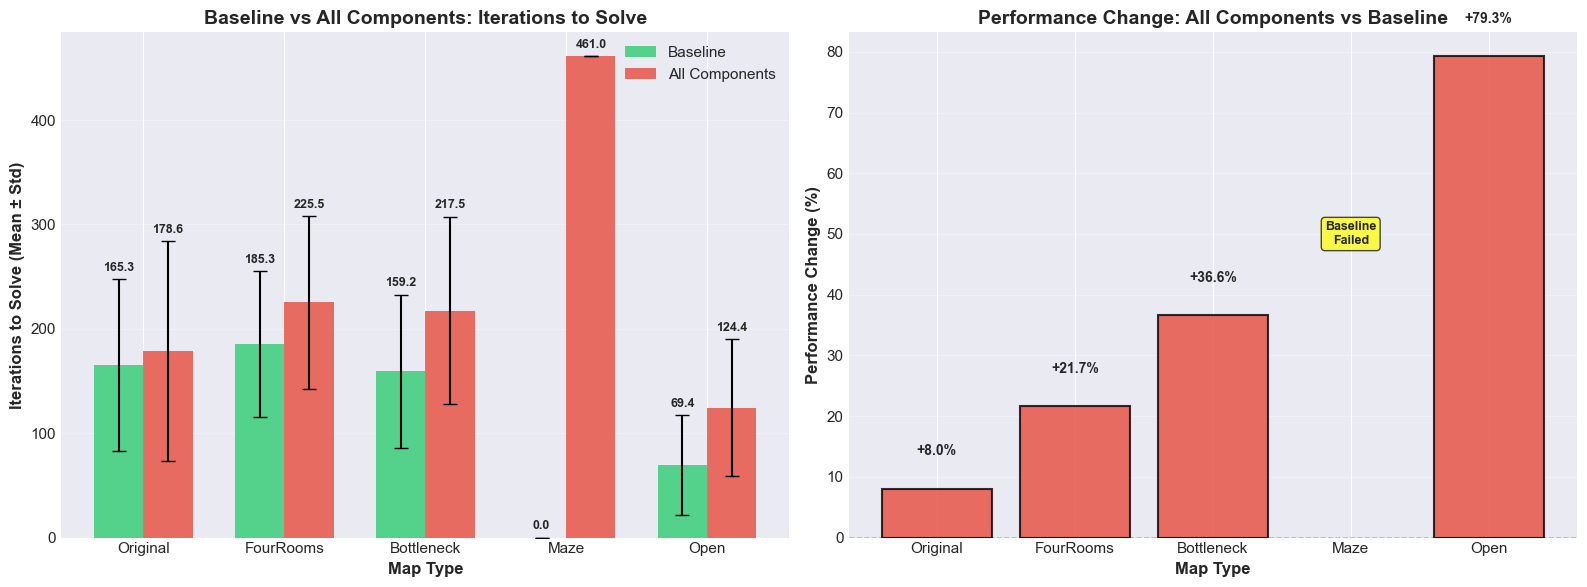


Map             | Baseline     | All Components     | Change    
Original        |  165.3 ±  82.0 |  178.6 ± 105.4 |    +8.0%
FourRooms       |  185.3 ±  69.9 |  225.5 ±  82.7 |   +21.7%
Bottleneck      |  159.2 ±  73.6 |  217.5 ±  90.0 |   +36.6%
Maze            |    0.0 ±   0.0 |  461.0 ±   0.0 | Baseline Failed
Open            |   69.4 ±  48.0 |  124.4 ±  65.8 |   +79.3%


In [41]:
# Extract Baseline and All Components data
maps = list(data.keys())
baseline_means = [data[map_name]['Baseline (Original)']['mean'] for map_name in maps]
baseline_stds = [data[map_name]['Baseline (Original)']['std'] for map_name in maps]
all_components_means = [data[map_name]['All Components']['mean'] for map_name in maps]
all_components_stds = [data[map_name]['All Components']['std'] for map_name in maps]

# Calculate percentage change (handle division by zero for Maze where baseline is 0)
percentage_changes = []
for i in range(len(maps)):
    if baseline_means[i] == 0:
        # Baseline failed, so we can't calculate percentage change
        percentage_changes.append(float('inf') if all_components_means[i] > 0 else 0)
    else:
        percentage_changes.append(((all_components_means[i] - baseline_means[i]) / baseline_means[i]) * 100)

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Bar chart with error bars
x = np.arange(len(maps))
width = 0.35

bars1 = ax1.bar(x - width/2, baseline_means, width, yerr=baseline_stds, 
                label='Baseline', color='#2ecc71', alpha=0.8, capsize=5)
bars2 = ax1.bar(x + width/2, all_components_means, width, yerr=all_components_stds, 
                label='All Components', color='#e74c3c', alpha=0.8, capsize=5)

ax1.set_xlabel('Map Type', fontsize=12, fontweight='bold')
ax1.set_ylabel('Iterations to Solve (Mean ± Std)', fontsize=12, fontweight='bold')
ax1.set_title('Baseline vs All Components: Iterations to Solve', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(maps, rotation=0)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (base, all_comp) in enumerate(zip(baseline_means, all_components_means)):
    ax1.text(i - width/2, base + baseline_stds[i] + 5, f'{base:.1f}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax1.text(i + width/2, all_comp + all_components_stds[i] + 5, f'{all_comp:.1f}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 2: Percentage change
colors = ['#e74c3c' if pct > 0 else '#2ecc71' for pct in percentage_changes]
bars3 = ax2.bar(x, percentage_changes, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_xlabel('Map Type', fontsize=12, fontweight='bold')
ax2.set_ylabel('Performance Change (%)', fontsize=12, fontweight='bold')
ax2.set_title('Performance Change: All Components vs Baseline', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(maps, rotation=0)
ax2.grid(True, alpha=0.3, axis='y')

# Add percentage labels
for i, pct in enumerate(percentage_changes):
    if pct == float('inf'):
        label = 'Baseline\nFailed'
        y_pos = 50  # Place at a reasonable height
        ax2.text(i, y_pos, label, ha='center', va='center', 
                 fontsize=9, fontweight='bold', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    else:
        label = f'{pct:+.1f}%'
        y_pos = pct + (5 if pct > 0 else -8)
        ax2.text(i, y_pos, label, ha='center', va='bottom' if pct > 0 else 'top', 
                 fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary table
print("\n" + "="*80)
print(f"{'Map':<15} | {'Baseline':<12} | {'All Components':<18} | {'Change':<10}")
print("="*80)
for i, map_name in enumerate(maps):
    if percentage_changes[i] == float('inf'):
        change_str = "Baseline Failed"
    else:
        change_str = f"{percentage_changes[i]:>+7.1f}%"
    print(f"{map_name:<15} | {baseline_means[i]:>6.1f} ± {baseline_stds[i]:>5.1f} | "
          f"{all_components_means[i]:>6.1f} ± {all_components_stds[i]:>5.1f} | "
          f"{change_str}")
print("="*80)


## 2. All Configurations Comparison (All Maps)


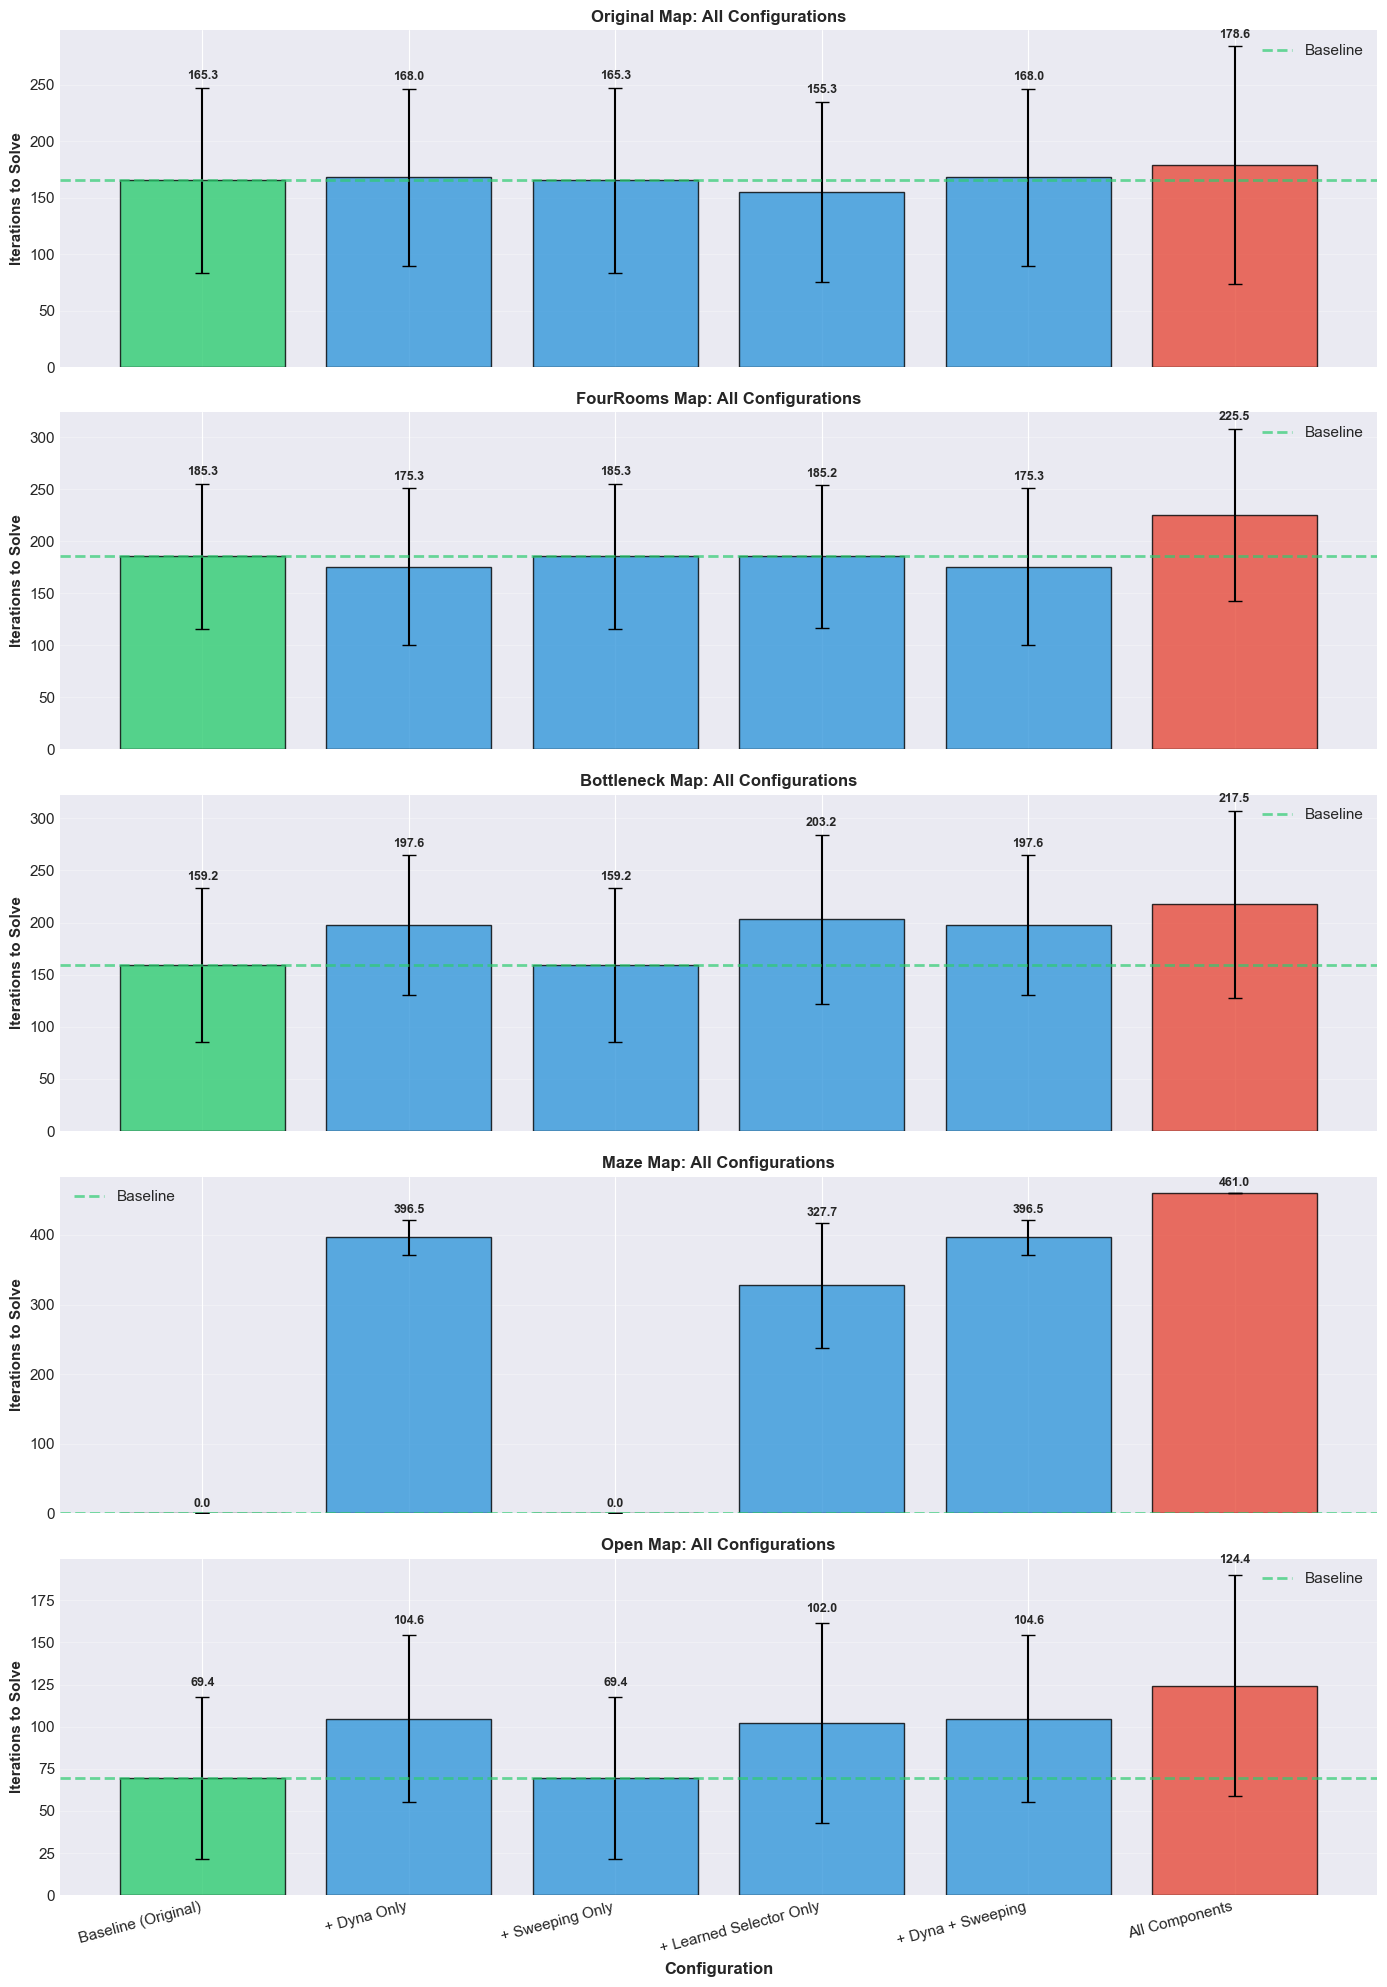

In [42]:
# Create a comprehensive comparison across all configurations
configs = ['Baseline (Original)', '+ Dyna Only', '+ Sweeping Only', 
           '+ Learned Selector Only', '+ Dyna + Sweeping', 'All Components']

fig, axes = plt.subplots(len(maps), 1, figsize=(14, 4*len(maps)), sharex=True)
if len(maps) == 1:
    axes = [axes]

for idx, map_name in enumerate(maps):
    ax = axes[idx]
    
    means = [data[map_name][config]['mean'] for config in configs]
    stds = [data[map_name][config]['std'] for config in configs]
    
    x = np.arange(len(configs))
    colors = ['#2ecc71' if config == 'Baseline (Original)' else 
              '#e74c3c' if config == 'All Components' else
              '#3498db' for config in configs]
    
    bars = ax.bar(x, means, yerr=stds, capsize=5, alpha=0.8, color=colors, edgecolor='black', linewidth=1)
    
    # Highlight baseline with reference line
    baseline_val = means[0]
    ax.axhline(y=baseline_val, color='#2ecc71', linestyle='--', linewidth=2, alpha=0.7, label='Baseline')
    
    ax.set_ylabel('Iterations to Solve', fontsize=11, fontweight='bold')
    ax.set_title(f'{map_name} Map: All Configurations', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(configs, rotation=15, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    ax.legend()
    
    # Add value labels
    for i, (mean, std) in enumerate(zip(means, stds)):
        ax.text(i, mean + std + 5, f'{mean:.1f}', ha='center', va='bottom', 
                fontsize=9, fontweight='bold')

plt.xlabel('Configuration', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


## 3. Summary Statistics and Key Insights


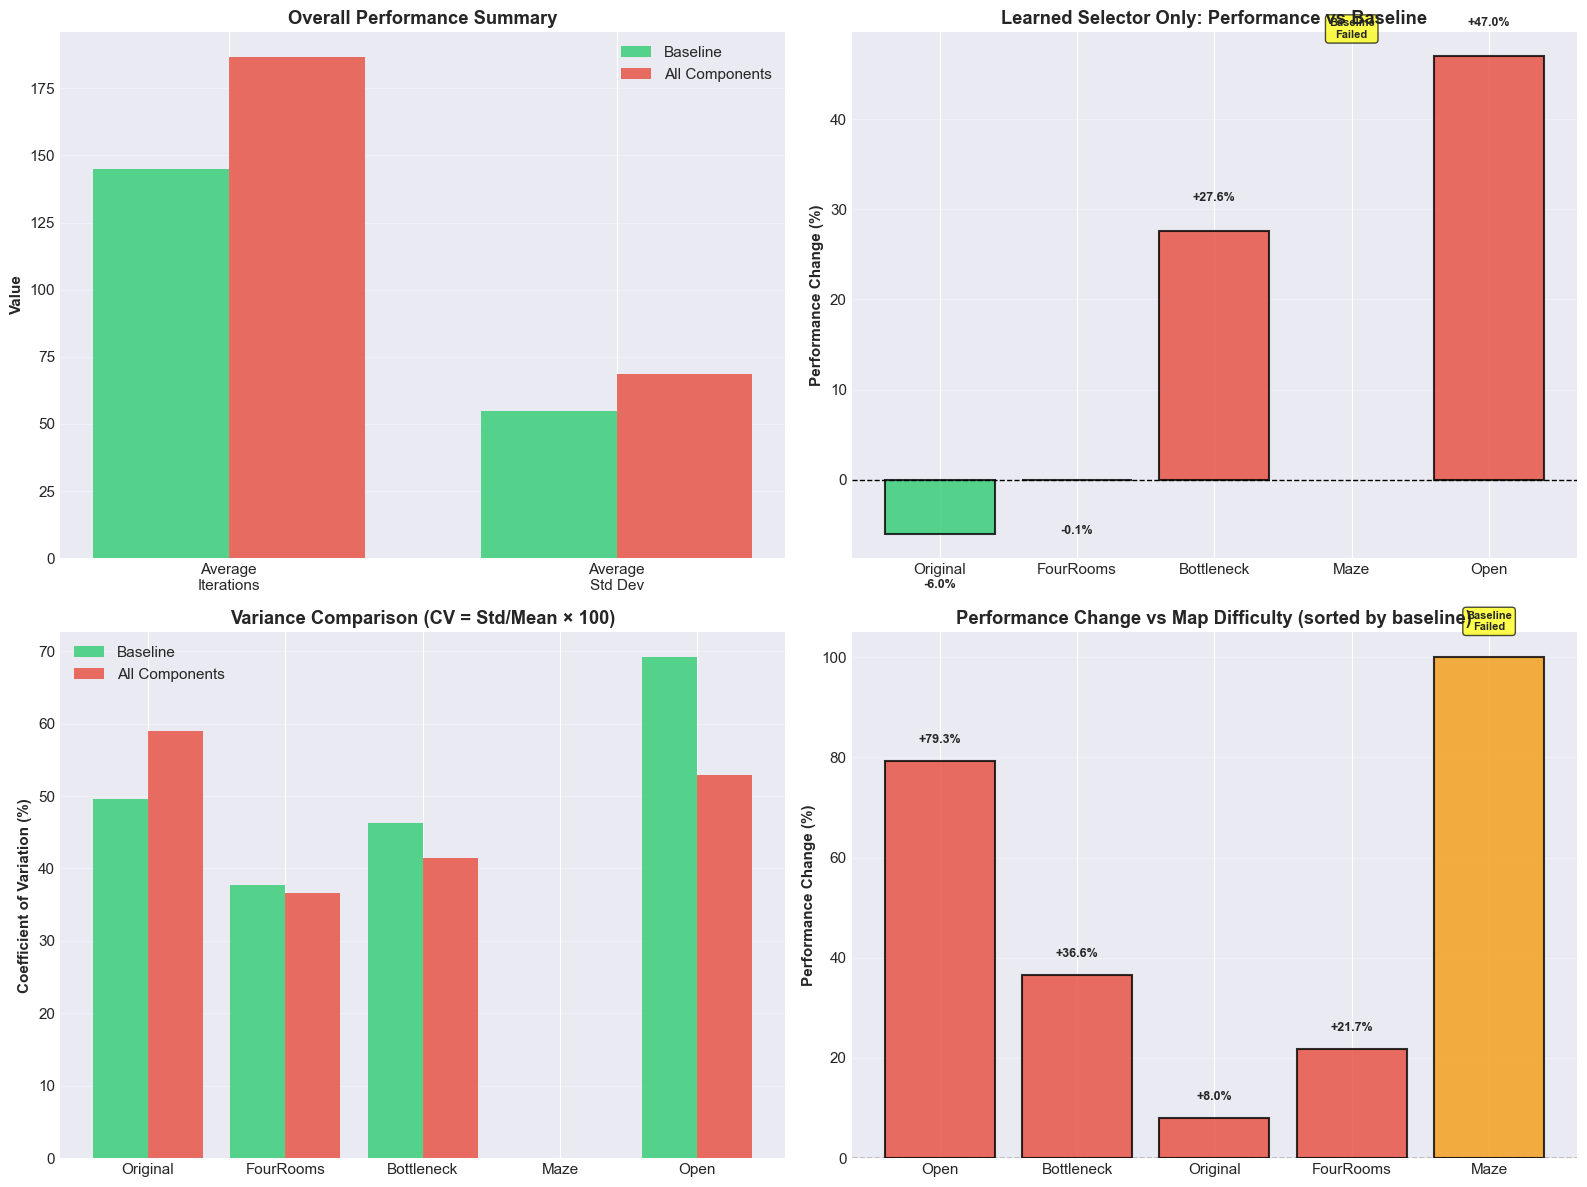


KEY STATISTICS
Baseline Average: 144.8 iterations
All Components Average: 186.5 iterations
Overall Change: +28.8%
Average Baseline Std: 54.7
Average All Components Std: 68.8

Best map for All Components: Original (+8.0%)
Worst map for All Components: Open (+79.3%)
Note: Maze map baseline failed (0% success), but All Components achieved 4% success


In [43]:
# Create summary statistics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Overall performance comparison
ax1 = axes[0, 0]
# Exclude Maze from average calculation since baseline failed there
valid_indices = [i for i in range(len(maps)) if baseline_means[i] > 0]
avg_baseline = np.mean([baseline_means[i] for i in valid_indices])
avg_all_comp = np.mean([all_components_means[i] for i in valid_indices])
overall_change = ((avg_all_comp - avg_baseline) / avg_baseline) * 100

categories = ['Average\nIterations', 'Average\nStd Dev']
baseline_vals = [avg_baseline, np.mean(baseline_stds)]
all_comp_vals = [avg_all_comp, np.mean(all_components_stds)]

x_cat = np.arange(len(categories))
width = 0.35
ax1.bar(x_cat - width/2, baseline_vals, width, label='Baseline', color='#2ecc71', alpha=0.8)
ax1.bar(x_cat + width/2, all_comp_vals, width, label='All Components', color='#e74c3c', alpha=0.8)
ax1.set_xticks(x_cat)
ax1.set_xticklabels(categories)
ax1.set_ylabel('Value', fontweight='bold')
ax1.set_title('Overall Performance Summary', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2. Learned Selector performance (the promising component)
ax2 = axes[0, 1]
ls_means = [data[map_name]['+ Learned Selector Only']['mean'] for map_name in maps]
ls_stds = [data[map_name]['+ Learned Selector Only']['std'] for map_name in maps]
ls_changes = []
for i in range(len(maps)):
    if baseline_means[i] == 0:
        # Baseline failed, so we can't calculate percentage change
        ls_changes.append(float('inf') if ls_means[i] > 0 else 0)
    else:
        ls_changes.append(((ls_means[i] - baseline_means[i]) / baseline_means[i]) * 100)

# Redefine x for maps (not configs)
x_maps = np.arange(len(maps))
colors_ls = ['#2ecc71' if c < 0 else '#e74c3c' for c in ls_changes]
bars = ax2.bar(x_maps, ls_changes, color=colors_ls, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_xticks(x_maps)
ax2.set_xticklabels(maps, rotation=0)
ax2.set_ylabel('Performance Change (%)', fontweight='bold')
ax2.set_title('Learned Selector Only: Performance vs Baseline', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
for i, (pct, mean) in enumerate(zip(ls_changes, ls_means)):
    if pct == float('inf'):
        ax2.text(i, 50, 'Baseline\nFailed', ha='center', va='center', 
                 fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    else:
        ax2.text(i, pct + (3 if pct > 0 else -5), f'{pct:+.1f}%', 
                 ha='center', va='bottom' if pct > 0 else 'top', fontsize=9, fontweight='bold')

# 3. Standard deviation comparison (variance analysis)
ax3 = axes[1, 0]
# Calculate coefficient of variation, handling division by zero
baseline_cv = []
all_comp_cv = []
for i in range(len(maps)):
    if baseline_means[i] > 0:
        baseline_cv.append(baseline_stds[i] / baseline_means[i] * 100)
    else:
        baseline_cv.append(0)  # Baseline failed, no variance
    if all_components_means[i] > 0:
        all_comp_cv.append(all_components_stds[i] / all_components_means[i] * 100)
    else:
        all_comp_cv.append(0)  # All components failed, no variance

ax3.bar(x_maps - 0.2, baseline_cv, 0.4, label='Baseline', color='#2ecc71', alpha=0.8)
ax3.bar(x_maps + 0.2, all_comp_cv, 0.4, label='All Components', color='#e74c3c', alpha=0.8)
ax3.set_xticks(x_maps)
ax3.set_xticklabels(maps, rotation=0)
ax3.set_ylabel('Coefficient of Variation (%)', fontweight='bold')
ax3.set_title('Variance Comparison (CV = Std/Mean × 100)', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Performance degradation by map complexity
ax4 = axes[1, 1]
# Sort maps by baseline difficulty (lower = easier), but put Maze (baseline=0) at the end
map_difficulty = sorted(zip(maps, baseline_means), key=lambda x: (x[1] == 0, x[1]))
sorted_maps = [m[0] for m in map_difficulty]
sorted_changes = [percentage_changes[maps.index(m)] for m in sorted_maps]

# Handle infinite values for coloring
colors_sorted = []
for pct in sorted_changes:
    if pct == float('inf'):
        colors_sorted.append('#f39c12')  # Orange for baseline failure case
    elif pct > 0:
        colors_sorted.append('#e74c3c')  # Red for slower
    else:
        colors_sorted.append('#2ecc71')  # Green for faster

x_sorted = np.arange(len(sorted_maps))
# Replace inf with a large value for plotting
sorted_changes_plot = [p if p != float('inf') else 100 for p in sorted_changes]
bars = ax4.bar(x_sorted, sorted_changes_plot, color=colors_sorted, alpha=0.8, edgecolor='black', linewidth=1.5)
ax4.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax4.set_xticks(x_sorted)
ax4.set_xticklabels(sorted_maps, rotation=0)
ax4.set_ylabel('Performance Change (%)', fontweight='bold')
ax4.set_title('Performance Change vs Map Difficulty (sorted by baseline)', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
for i, (pct, pct_plot) in enumerate(zip(sorted_changes, sorted_changes_plot)):
    if pct == float('inf'):
        ax4.text(i, pct_plot + 5, 'Baseline\nFailed', ha='center', va='bottom', 
                 fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    else:
        ax4.text(i, pct_plot + (3 if pct > 0 else -5), f'{pct:+.1f}%', 
                 ha='center', va='bottom' if pct > 0 else 'top', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print("KEY STATISTICS")
print(f"{'='*80}")
print(f"Baseline Average: {avg_baseline:.1f} iterations")
print(f"All Components Average: {avg_all_comp:.1f} iterations")
print(f"Overall Change: {overall_change:+.1f}%")
print(f"Average Baseline Std: {np.mean(baseline_stds):.1f}")
print(f"Average All Components Std: {np.mean(all_components_stds):.1f}")
# Filter out infinite values for min/max calculation
valid_pct_changes = [p for p in percentage_changes if p != float('inf')]
if valid_pct_changes:
    best_idx = [i for i, p in enumerate(percentage_changes) if p == min(valid_pct_changes)][0]
    worst_idx = [i for i, p in enumerate(percentage_changes) if p == max(valid_pct_changes)][0]
    print(f"\nBest map for All Components: {maps[best_idx]} ({min(valid_pct_changes):+.1f}%)")
    print(f"Worst map for All Components: {maps[worst_idx]} ({max(valid_pct_changes):+.1f}%)")
    # Check if Maze had baseline failure
    maze_idx = maps.index('Maze')
    if percentage_changes[maze_idx] == float('inf'):
        print(f"Note: Maze map baseline failed (0% success), but All Components achieved 4% success")
else:
    print("Note: All maps had baseline failures or invalid comparisons")
print(f"{'='*80}")


## 4. Data Summary Table


In [44]:
# Create a comprehensive summary table
summary_data = []
for map_name in maps:
    for config in configs:
        mean = data[map_name][config]['mean']
        std = data[map_name][config]['std']
        success = data[map_name][config]['success']
        
        # Calculate relative to baseline
        baseline_mean = data[map_name]['Baseline (Original)']['mean']
        if config == 'Baseline (Original)':
            change = 0.0
            change_str = 'baseline'
        elif baseline_mean == 0:
            # Baseline failed, so we can't calculate percentage change
            if mean > 0:
                change = float('inf')
                change_str = 'N/A (baseline failed)'
            else:
                change = 0.0
                change_str = 'N/A (both failed)'
        else:
            change = ((mean - baseline_mean) / baseline_mean) * 100
            change_str = f'{change:+.1f}%'
        
        summary_data.append({
            'Map': map_name,
            'Configuration': config,
            'Mean': mean,
            'Std': std,
            'Mean ± Std': f'{mean:.1f} ± {std:.1f}',
            'Success Rate': f'{success:.1f}%',
            'Change vs Baseline': change_str,
            'Change (%)': change
        })

# Display formatted table
print("\n" + "="*100)
print("COMPREHENSIVE RESULTS SUMMARY")
print("="*100)
print(f"{'Map':<12} | {'Configuration':<25} | {'Mean ± Std':<15} | {'Success':<10} | {'Change':<12}")
print("-" * 100)
for row in summary_data:
    print(f"{row['Map']:<12} | {row['Configuration']:<25} | {row['Mean ± Std']:<15} | "
          f"{row['Success Rate']:<10} | {row['Change vs Baseline']:<12}")
print("="*100)

# Use pandas if available, otherwise save as simple CSV
if HAS_PANDAS:
    df = pd.DataFrame(summary_data)
    df.to_csv('go_explore_results_summary.csv', index=False)
    print("\nResults saved to 'go_explore_results_summary.csv'")
else:
    # Simple CSV export without pandas
    import csv
    with open('go_explore_results_summary.csv', 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=summary_data[0].keys())
        writer.writeheader()
        writer.writerows(summary_data)
    print("\nResults saved to 'go_explore_results_summary.csv' (using csv module)")



COMPREHENSIVE RESULTS SUMMARY
Map          | Configuration             | Mean ± Std      | Success    | Change      
----------------------------------------------------------------------------------------------------
Original     | Baseline (Original)       | 165.3 ± 82.0    | 100.0%     | baseline    
Original     | + Dyna Only               | 168.0 ± 78.3    | 100.0%     | +1.6%       
Original     | + Sweeping Only           | 165.3 ± 82.0    | 100.0%     | +0.0%       
Original     | + Learned Selector Only   | 155.3 ± 79.9    | 100.0%     | -6.0%       
Original     | + Dyna + Sweeping         | 168.0 ± 78.3    | 100.0%     | +1.6%       
Original     | All Components            | 178.6 ± 105.4   | 100.0%     | +8.0%       
FourRooms    | Baseline (Original)       | 185.3 ± 69.9    | 100.0%     | baseline    
FourRooms    | + Dyna Only               | 175.3 ± 75.3    | 100.0%     | -5.4%       
FourRooms    | + Sweeping Only           | 185.3 ± 69.9    | 100.0%     | +0.0%      

## 5. Map Layout Visualizations

Visualizations of the 5 different map configurations used in the experiments.


In [45]:
# MapGenerator class (from go_explore_enhanced.ipynb)
class MapGenerator:
    @staticmethod
    def get_empty_grid(size=16):
        return [['F' for _ in range(size)] for _ in range(size)]

    @staticmethod
    def create_original():
        """Original strategic map"""
        custom_map = []
        for i in range(16):
            row = ['F'] * 16
            custom_map.append(row)
        custom_map[0][0] = 'S'
        custom_map[11][11] = 'G'
        
        holes = [
            (4, 4), (4, 5), (4, 6), (4, 7),
            (8, 8), (8, 9), (8, 10), (8, 11),
            (12, 6), (12, 7), (12, 8), (12, 9),
            (6, 11), (7, 11), (8, 11), (9, 11), (10, 11),
            (10, 2), (10, 3), (10, 4), (10, 5),
            (2, 10), (3, 10), (4, 10), (5, 10),
            (1, 5), (1, 8), (1, 12),
            (5, 1), (5, 9), (5, 14),
            (9, 1), (9, 6), (9, 13),
            (13, 3), (13, 8), (13, 12),
            (14, 1), (14, 5), (14, 10),
        ]
        for r, c in holes:
            custom_map[r][c] = 'H'
        return [''.join(row) for row in custom_map]

    @staticmethod
    def create_four_rooms():
        grid = [['F' for _ in range(16)] for _ in range(16)]
        # Walls
        for i in range(16):
            grid[7][i] = 'H'  # Horizontal divider
            grid[i][7] = 'H'  # Vertical divider
            
        # Doorways
        grid[7][3] = 'F'  # Top-left to Bottom-left
        grid[7][12] = 'F' # Top-right to Bottom-right
        grid[3][7] = 'F'  # Top-left to Top-right
        grid[12][7] = 'F' # Bottom-left to Bottom-right
        
        grid[0][0] = 'S'
        grid[15][15] = 'G'
        return [''.join(row) for row in grid]

    @staticmethod
    def create_bottleneck():
        grid = [['F' for _ in range(16)] for _ in range(16)]
        # Wall in the middle column
        for i in range(16):
            if i != 8: # Gap at row 8
                grid[i][8] = 'H'
        
        grid[0][0] = 'S'
        grid[15][15] = 'G'
        return [''.join(row) for row in grid]

    @staticmethod
    def create_maze():
        """
        Generate a proper maze using recursive backtracking algorithm.
        Creates a maze with a single solution path from start to goal.
        """
        import random
        size = 16
        grid = [['H' for _ in range(size)] for _ in range(size)]  # Start with all walls
        
        # Use recursive backtracking to carve paths
        # Work with a 7x7 cell maze (each cell is 2x2 in the 16x16 grid)
        maze_size = 7
        visited = [[False for _ in range(maze_size)] for _ in range(maze_size)]
        stack = []
        
        # Start from top-left
        current = (0, 0)
        visited[0][0] = True
        stack.append(current)
        
        # Directions: up, right, down, left
        directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]
        
        while stack:
            current = stack[-1]
            cy, cx = current
            
            # Find unvisited neighbors
            neighbors = []
            for dy, dx in directions:
                ny, nx = cy + dy, cx + dx
                if 0 <= ny < maze_size and 0 <= nx < maze_size and not visited[ny][nx]:
                    neighbors.append((ny, nx, dy, dx))
            
            if neighbors:
                # Choose random neighbor
                ny, nx, dy, dx = random.choice(neighbors)
                
                # Carve path between current and next
                # Convert maze coordinates to grid coordinates
                grid_y1 = cy * 2 + 1
                grid_x1 = cx * 2 + 1
                grid_y2 = ny * 2 + 1
                grid_x2 = nx * 2 + 1
                
                # Carve the cells
                grid[grid_y1][grid_x1] = 'F'
                grid[grid_y2][grid_x2] = 'F'
                
                # Carve the wall between them
                wall_y = (grid_y1 + grid_y2) // 2
                wall_x = (grid_x1 + grid_x2) // 2
                grid[wall_y][wall_x] = 'F'
                
                # Mark as visited and add to stack
                visited[ny][nx] = True
                stack.append((ny, nx))
            else:
                # Backtrack
                stack.pop()
        
        # Carve all visited maze cells (in case some weren't carved)
        for cy in range(maze_size):
            for cx in range(maze_size):
                if visited[cy][cx]:
                    grid_y = cy * 2 + 1
                    grid_x = cx * 2 + 1
                    grid[grid_y][grid_x] = 'F'
        
        # Ensure borders are walls except for start/goal paths
        for i in range(size):
            grid[0][i] = 'H'
            grid[size-1][i] = 'H'
            grid[i][0] = 'H'
            grid[i][size-1] = 'H'
        
        # Carve entrance and exit paths
        grid[0][0] = 'F'  # Entrance
        grid[0][1] = 'F'
        grid[1][0] = 'F'
        grid[1][1] = 'F'
        
        grid[size-1][size-1] = 'F'  # Exit
        grid[size-1][size-2] = 'F'
        grid[size-2][size-1] = 'F'
        grid[size-2][size-2] = 'F'
        
        # Ensure there's a path from entrance to the maze interior
        if grid[2][1] == 'H':
            grid[2][1] = 'F'
        if grid[1][2] == 'H':
            grid[1][2] = 'F'
        
        # Ensure there's a path from maze interior to exit
        if grid[size-3][size-2] == 'H':
            grid[size-3][size-2] = 'F'
        if grid[size-2][size-3] == 'H':
            grid[size-2][size-3] = 'F'
        
        # Set start and goal
        grid[0][0] = 'S'
        grid[size-1][size-1] = 'G'
        
        return [''.join(row) for row in grid]
    
    @staticmethod
    def create_open():
        grid = [['F' for _ in range(16)] for _ in range(16)]
        grid[0][0] = 'S'
        grid[15][15] = 'G'
        # Few random holes
        grid[5][5] = 'H'
        grid[10][10] = 'H'
        return [''.join(row) for row in grid]

# Generate all maps
maps_layouts = {
    "Original": MapGenerator.create_original(),
    "FourRooms": MapGenerator.create_four_rooms(),
    "Bottleneck": MapGenerator.create_bottleneck(),
    "Maze": MapGenerator.create_maze(),
    "Open": MapGenerator.create_open()
}

print("Maps generated successfully!")


Maps generated successfully!


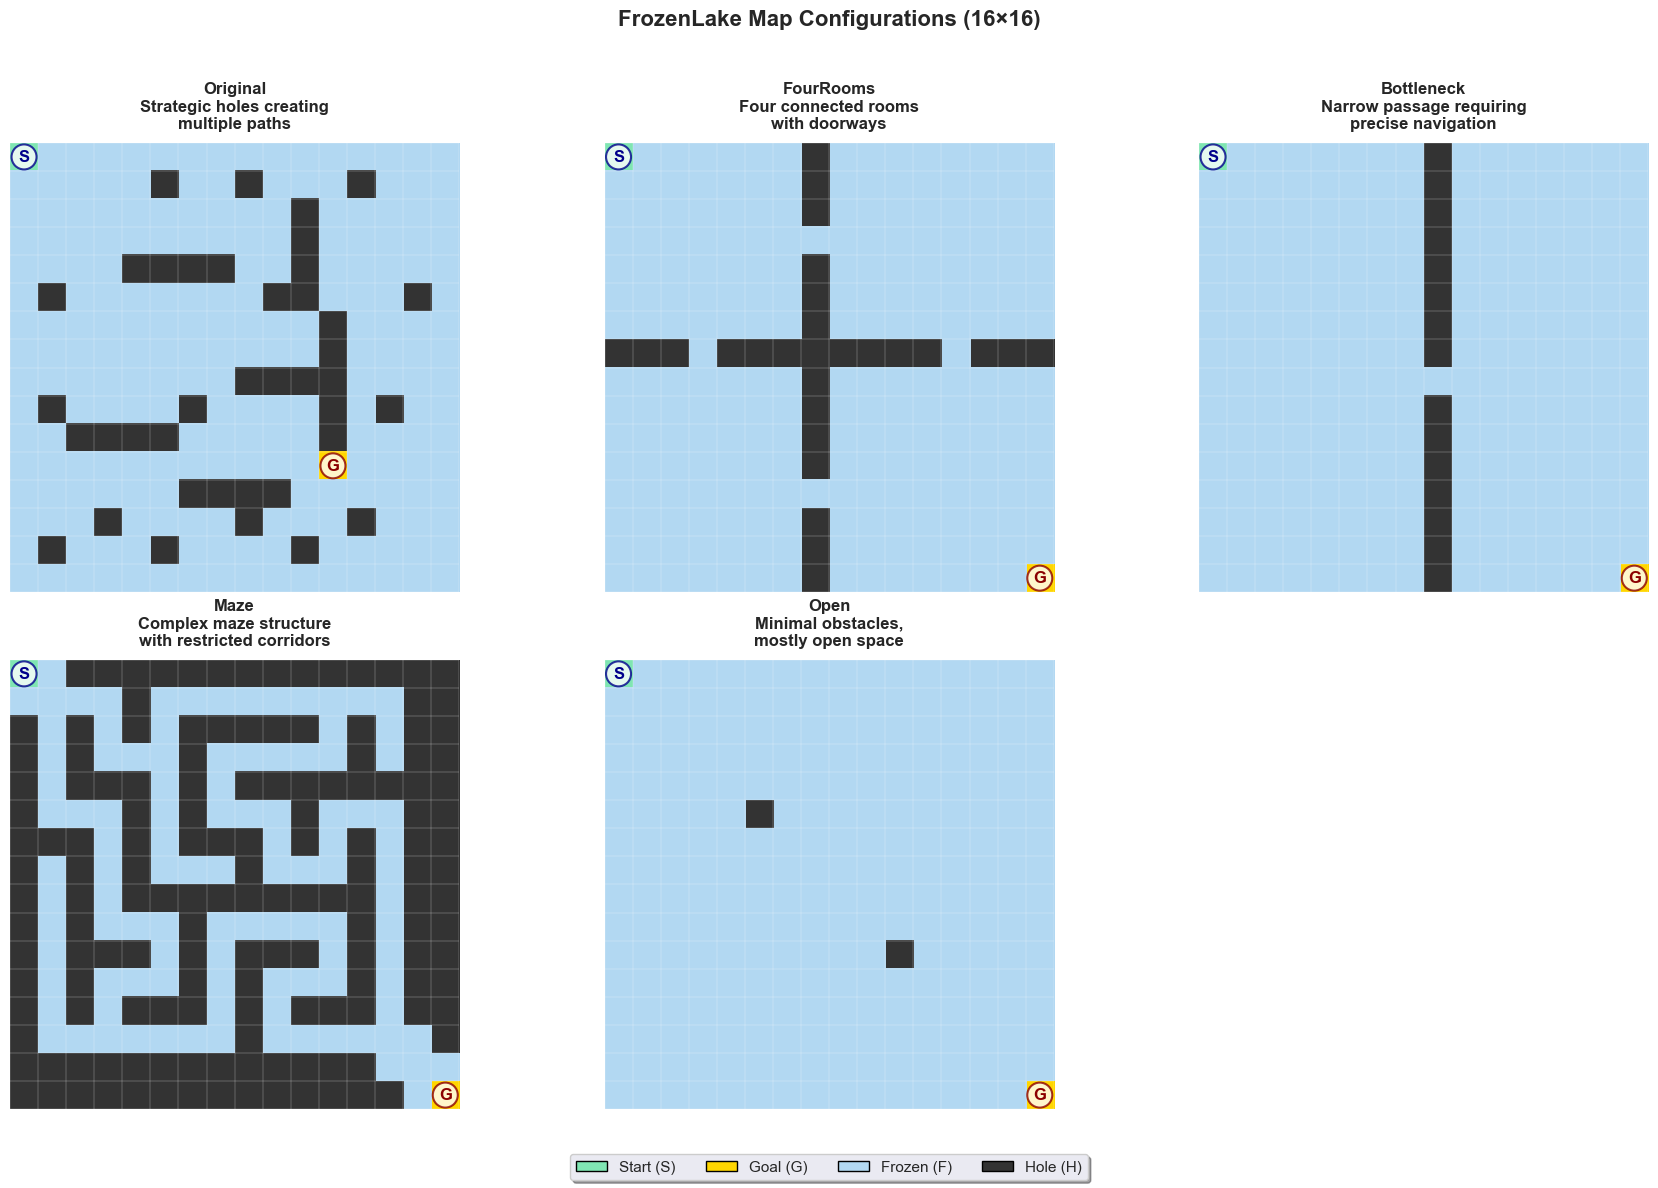


MAP STATISTICS
Original       :  39 holes, 215 frozen tiles, Start at (0,0), Goal at (15,15) or (11,11)
FourRooms      :  27 holes, 227 frozen tiles, Start at (0,0), Goal at (15,15) or (11,11)
Bottleneck     :  15 holes, 239 frozen tiles, Start at (0,0), Goal at (15,15) or (11,11)
Maze           : 149 holes, 105 frozen tiles, Start at (0,0), Goal at (15,15) or (11,11)
Open           :   2 holes, 252 frozen tiles, Start at (0,0), Goal at (15,15) or (11,11)


In [46]:
# Visualize all maps in a grid
def visualize_map(map_layout, ax, title):
    """Convert map layout to visualization array and plot it."""
    size = len(map_layout)
    # Create RGB array for better color control
    vis_array = np.zeros((size, size, 3))
    
    for i, row in enumerate(map_layout):
        for j, cell in enumerate(row):
            if cell == 'S':  # Start - Light green/blue
                vis_array[i, j] = [0.5, 0.9, 0.7]  # Light green
            elif cell == 'G':  # Goal - Gold/Yellow
                vis_array[i, j] = [1.0, 0.84, 0.0]  # Gold
            elif cell == 'H':  # Hole - Dark gray/black
                vis_array[i, j] = [0.2, 0.2, 0.2]  # Dark gray
            else:  # Frozen - Light blue/gray
                vis_array[i, j] = [0.7, 0.85, 0.95]  # Light blue-gray
    
    im = ax.imshow(vis_array, aspect='equal', interpolation='nearest')
    
    # Add grid lines for clarity
    ax.set_xticks(np.arange(-0.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, size, 1), minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=0.3, alpha=0.6)
    
    # Add labels for Start and Goal
    for i, row in enumerate(map_layout):
        for j, cell in enumerate(row):
            if cell == 'S':
                ax.text(j, i, 'S', ha='center', va='center', fontsize=12, fontweight='bold', 
                       color='darkblue', bbox=dict(boxstyle='circle', facecolor='white', alpha=0.8, edgecolor='darkblue', linewidth=1.5))
            elif cell == 'G':
                ax.text(j, i, 'G', ha='center', va='center', fontsize=12, fontweight='bold', 
                       color='darkred', bbox=dict(boxstyle='circle', facecolor='white', alpha=0.8, edgecolor='darkred', linewidth=1.5))
    
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xticks([])
    ax.set_yticks([])
    
    return im

# Create figure with all 5 maps
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

map_descriptions = {
    "Original": "Strategic holes creating\nmultiple paths",
    "FourRooms": "Four connected rooms\nwith doorways",
    "Bottleneck": "Narrow passage requiring\nprecise navigation",
    "Maze": "Complex maze structure\nwith restricted corridors",
    "Open": "Minimal obstacles,\nmostly open space"
}

for idx, (map_name, map_layout) in enumerate(maps_layouts.items()):
    ax = axes[idx]
    title = f"{map_name}\n{map_descriptions[map_name]}"
    visualize_map(map_layout, ax, title)

# Remove the last empty subplot
fig.delaxes(axes[5])

# Add legend instead of colorbar (more presentation-friendly)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=[0.5, 0.9, 0.7], edgecolor='black', label='Start (S)'),
    Patch(facecolor=[1.0, 0.84, 0.0], edgecolor='black', label='Goal (G)'),
    Patch(facecolor=[0.7, 0.85, 0.95], edgecolor='black', label='Frozen (F)'),
    Patch(facecolor=[0.2, 0.2, 0.2], edgecolor='black', label='Hole (H)')
]
fig.legend(handles=legend_elements, loc='lower center', ncol=4, fontsize=11, frameon=True, 
          fancybox=True, shadow=True)

plt.suptitle('FrozenLake Map Configurations (16×16)', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.show()

# Print map statistics
print("\n" + "="*80)
print("MAP STATISTICS")
print("="*80)
for map_name, map_layout in maps_layouts.items():
    holes = sum(row.count('H') for row in map_layout)
    frozen = sum(row.count('F') for row in map_layout)
    print(f"{map_name:<15}: {holes:>3} holes, {frozen:>3} frozen tiles, Start at (0,0), Goal at (15,15) or (11,11)")
print("="*80)


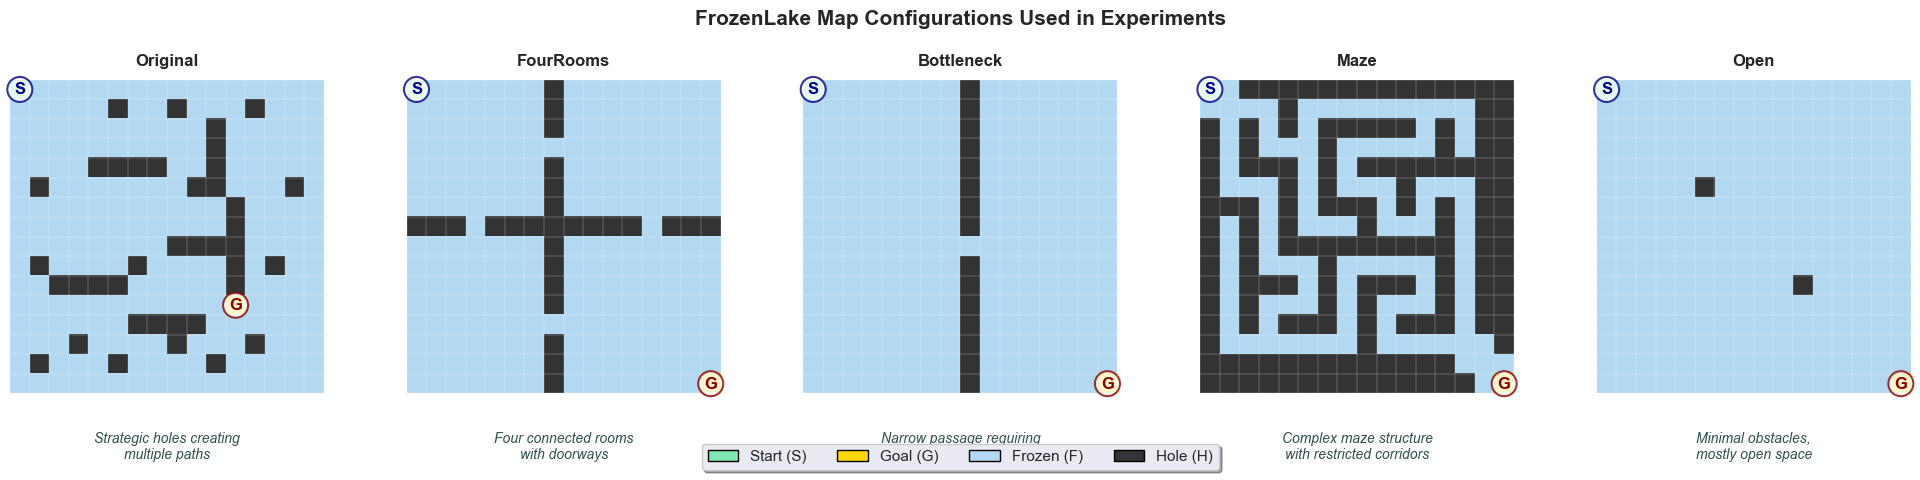

In [47]:
# Alternative: Individual larger maps for presentation (better for slides)
fig, axes = plt.subplots(1, 5, figsize=(20, 4.5))

for idx, (map_name, map_layout) in enumerate(maps_layouts.items()):
    ax = axes[idx]
    visualize_map(map_layout, ax, map_name)
    # Add description below
    ax.text(0.5, -0.12, map_descriptions[map_name], transform=ax.transAxes, 
            ha='center', va='top', fontsize=10, style='italic', color='darkslategray')

# Add legend
legend_elements = [
    Patch(facecolor=[0.5, 0.9, 0.7], edgecolor='black', label='Start (S)'),
    Patch(facecolor=[1.0, 0.84, 0.0], edgecolor='black', label='Goal (G)'),
    Patch(facecolor=[0.7, 0.85, 0.95], edgecolor='black', label='Frozen (F)'),
    Patch(facecolor=[0.2, 0.2, 0.2], edgecolor='black', label='Hole (H)')
]
fig.legend(handles=legend_elements, loc='lower center', ncol=4, fontsize=11, frameon=True, 
          fancybox=True, shadow=True, bbox_to_anchor=(0.5, -0.02))

plt.suptitle('FrozenLake Map Configurations Used in Experiments', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.08, 1, 0.98])
plt.show()
